### 垃圾邮件分类

此部分使用Python自带的库进行垃圾邮件分类

数据说明：

- 数据需要解压data.rar文件
- 数据在当前目录下的data目录下，一共包括215个文件夹，每个文件夹大概有300封邮件，所以一共有215*300 = 64500封邮件
- 每封邮件的标签在当前目录下的full目录下的index文件，其格式如下：


		spam ../data/000/000
		ham ../data/000/001
		spam ../data/000/002
		spam ../data/000/003
		spam ../data/000/004
		spam ../data/000/005




- 邮件内容为中文
- spam：表示垃圾邮件
- ham：表示正常邮件


#### 模型选择

朴素贝叶斯、SVM、KNN、决策树、随机森林、GBDT


#### 方案

![](2.png)


#### 一、数据处理

从原始数据中，将邮件数据转换称为结构化类型的数据，并且去掉其它不需要的字段信息，只需要保留发件人、收件人、发送时间、邮件内容这四部分的内容，对于这四个字段信息，如果这四个字段为空，那么将为空的属性设置为unknown。

In [1]:
import os
import time


def 制作标签字典(file_path):
    type_dict = {'spam': '1', 'ham': '0'}
    # 打开文件
    index_file = open(file_path)
    index_dict = {}
    try:
        for line in index_file:
            arr = line.split(' ')
            if len(arr) == 2:
                key, value = arr
            # 将字典的值'../data/000/000'的../data删除 也删除 最后的换行符
            value = value.replace('../data', '').replace('\n', '')
            index_dict[value] = type_dict[key.lower()]
    finally:
        index_file.close()
    return index_dict


def 读取邮件内容(file_path):
    # 以只读的形式打开邮件
    file = open(file_path, 'r', encoding='gb2312', errors='ignore')
    content_dict = {}

    try:
        is_content = False  # 定义一个开关
        for line in file:  # 遍历每一行
            line = line.strip()  # 将所有的空格切掉
            if line.startswith('From:'):
                # 将其内容添加到支点
                content_dict['From'] = line[5:]
            elif line.startswith('To:'):
                content_dict['To'] = line[3:]
            elif line.startswith('Date:'):
                content_dict['Date'] = line[5:]
            elif not line:  # 如果是空行
                is_content = True

            if is_content:
                if 'content' in content_dict:  # 判断字典中有没有 key：content
                    content_dict['content'] += line
                else:
                    content_dict['content'] = line
    finally:
        file.close()

        return content_dict


def 字典转文本(file_path):  # 将每一份 邮件都转换为一行，各内容用‘，’隔开
    content_dict = 读取邮件内容(file_path)

    result_str = content_dict.get('From', 'unkonwn').replace(',', '').strip() + ','
    result_str += content_dict.get('To', 'unkonwn').replace(',', '').strip() + ','
    result_str += content_dict.get('Date', 'unkonwn').replace(',', '').strip() + ','
    result_str += content_dict.get('content', 'unkonwn').replace(',', '').strip()

    return result_str


start = time.time()
index_dict = 制作标签字典('./full/index')
# 将文件夹下的文件或文件夹的名称列表返回
# 就是说在/data路径下的000文件夹到215文件夹的名称返回，以便后边遍历所有的文件


list0 = os.listdir('./data')
# 开始遍历每一个文件夹[000-215]
for dir1 in list0:
    # 得到处理的路径 ./data/000
    current_path = './data/' + dir1

    print('正在处理的文件夹是：', current_path)
    # 000文件夹路径，在该路径下还有300左右各文件
    dir_path = os.listdir(current_path)
    # dir_path 就是000文件夹下所有文件的列表
    # 将每一个文件夹中的所有文件的内容都写到一个文件，eg：将./data/000文件家中的000文件-299文件的内容写到./data/process_000中
    write_file_path = './data/process_' + dir1
    # print(write_file_path)
    with open(write_file_path, 'w', encoding='utf-8') as file:
        for dir2 in dir_path:
            # 得到要处理文件的路径 current_path + '/' +dir2 = ./data/000/000
            dir2_path = current_path + '/' + dir2
            # 开始写内容
            index_key = '/' + dir1 + '/' + dir2
            # print(index_dict[index_key])

            if index_key in index_dict:
                content_str = 字典转文本(dir2_path)
                # 给数据添加分类
                content_str += ',' + index_dict[index_key] + '\n'
                # 写入文件
                file.writelines(content_str)

# 将每个文件中的内容合并到一个文件
with open('./data/result_process', 'w', encoding='utf-8') as writer:
    for l1 in list0:
        file_path = './data/process_' + l1
        print('开始合并文件：', file_path)

        with open(file_path, encoding='utf-8') as file:
            for line in file:
                writer.writelines(line)
end = time.time()
print('总共耗时%.3fs' % (end - start))

正在处理的文件夹是： ./data/000
正在处理的文件夹是： ./data/001
正在处理的文件夹是： ./data/002
正在处理的文件夹是： ./data/003
正在处理的文件夹是： ./data/004
正在处理的文件夹是： ./data/005
正在处理的文件夹是： ./data/006
正在处理的文件夹是： ./data/007
正在处理的文件夹是： ./data/008
正在处理的文件夹是： ./data/009
正在处理的文件夹是： ./data/010
正在处理的文件夹是： ./data/011
正在处理的文件夹是： ./data/012
正在处理的文件夹是： ./data/013
正在处理的文件夹是： ./data/014
正在处理的文件夹是： ./data/015
正在处理的文件夹是： ./data/016
正在处理的文件夹是： ./data/017
正在处理的文件夹是： ./data/018
正在处理的文件夹是： ./data/019
正在处理的文件夹是： ./data/020
正在处理的文件夹是： ./data/021
正在处理的文件夹是： ./data/022
正在处理的文件夹是： ./data/023
正在处理的文件夹是： ./data/024
正在处理的文件夹是： ./data/025
正在处理的文件夹是： ./data/026
正在处理的文件夹是： ./data/027
正在处理的文件夹是： ./data/028
正在处理的文件夹是： ./data/029
正在处理的文件夹是： ./data/030
正在处理的文件夹是： ./data/031
正在处理的文件夹是： ./data/032
正在处理的文件夹是： ./data/033
正在处理的文件夹是： ./data/034
正在处理的文件夹是： ./data/035
正在处理的文件夹是： ./data/036
正在处理的文件夹是： ./data/037
正在处理的文件夹是： ./data/038
正在处理的文件夹是： ./data/039
正在处理的文件夹是： ./data/040
正在处理的文件夹是： ./data/041
正在处理的文件夹是： ./data/042
正在处理的文件夹是： ./data/043
正在处理的文件夹是： ./data/044
正在处理的文件夹是：

开始合并文件： ./data/process_129
开始合并文件： ./data/process_130
开始合并文件： ./data/process_131
开始合并文件： ./data/process_132
开始合并文件： ./data/process_133
开始合并文件： ./data/process_134
开始合并文件： ./data/process_135
开始合并文件： ./data/process_136
开始合并文件： ./data/process_137
开始合并文件： ./data/process_138
开始合并文件： ./data/process_139
开始合并文件： ./data/process_140
开始合并文件： ./data/process_141
开始合并文件： ./data/process_142
开始合并文件： ./data/process_143
开始合并文件： ./data/process_144
开始合并文件： ./data/process_145
开始合并文件： ./data/process_146
开始合并文件： ./data/process_147
开始合并文件： ./data/process_148
开始合并文件： ./data/process_149
开始合并文件： ./data/process_150
开始合并文件： ./data/process_151
开始合并文件： ./data/process_152
开始合并文件： ./data/process_153
开始合并文件： ./data/process_154
开始合并文件： ./data/process_155
开始合并文件： ./data/process_156
开始合并文件： ./data/process_157
开始合并文件： ./data/process_158
开始合并文件： ./data/process_159
开始合并文件： ./data/process_160
开始合并文件： ./data/process_161
开始合并文件： ./data/process_162
开始合并文件： ./data/process_163
开始合并文件： ./data/process_164
开始合并文件： ./data/process_165
开

#### 二、特征提取

In [2]:
import numpy as np
import pandas as pd
import re  # 正则
import jieba
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys

In [9]:
# 防止画图中文乱码
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False


# 读取数据
df = pd.read_csv('./data/result_process', sep=',', header=None, names=['From', 'To', 'date', 'content', 'label'])
print(df.head())

                                     From                 To  \
0                    yan<(8月27-28上海)培训课程>    lu@ccert.edu.cn   
1                     pan <pan@jdl.ac.cn>   shi@ccert.edu.cn   
2    =?GB2312?B?1cW6o8TP?= <jian@163.con>  xing@ccert.edu.cn   
3  =?GB2312?B?tPq/qreixrE=?= <pan@12.com>  ling@ccert.edu.cn   
4                   mei <mei@dghhkjk.com>  tang@ccert.edu.cn   

                             date  \
0  Tue 30 Aug 2005 10:08:15 +0800   
1  Sun 14 Aug 2005 10:16:47 +0800   
2  Sun 14 Aug 2005 10:17:57 +0800   
3  Sun 14 Aug 2005 10:19:02 +0800   
4  Sun 14 Aug 2005 10:21:22 +0800   

                                             content  label  
0  非财务纠淼牟莆窆芾-（沙盘模拟）------如何运用财务岳硖岣吖芾砑ㄐ[课 程 背 景]每一...    1.0  
1  讲的是孔子后人的故事。一个老领导回到家乡，跟儿子感情不和，跟贪财的孙子孔为本和睦。老领导的弟...    0.0  
2  尊敬的贵公司(财务/经理)负责人您好！我是深圳金海实业有限公司（广州。东莞）等省市有分公司。...    1.0  
3  贵公司负责人(经理/财务）您好：深圳市华龙公司受多家公司委托向外低点代开部分增值税电脑发票（...    1.0  
4  这是一封HTML格式信件！---------------------------------...    1.0  


In [4]:
# 特征工程1：提取邮件收发的服务器地址
def extract_email_server_address(str1):
    # 定义正则匹配项
    reg = re.compile('@[A-Za-z0-9]*\.[A-Za-z0-9\.]*')
    it = reg.findall(str(str1))  # findall返回一个列表
    result = ''
    if len(it) > 0:
        result = it[0]
    if not result:
        result = 'unknown'
    return result


# 将‘From’，‘To’的值进行清洗
df['from_address'] = pd.Series(map(lambda str: extract_email_server_address(str), df['From']))
df['to_address'] = pd.Series(map(lambda str: extract_email_server_address(str), df['To']))

# 统计邮件收发服务器的数量
print('================from===========')
print(df.from_address.value_counts().head())
# unique()返回一个列表，作用：将不重复的元素返回
print("总邮件发送服务器类别数量为:", str(df.from_address.unique().shape))

print('================to===========')
print(df.to_address.value_counts().head())
# unique()返回一个列表，作用：将不重复的元素返回
print("总邮件接收服务器类别数量为:", str(df.to_address.unique().shape))

# to_frame()作用：将Series转换为DataFrame
from_address_df = pd.DataFrame(df.from_address.value_counts())  # .to_frame()
len_less_10_from_adderss_count = from_address_df[from_address_df.from_address <= 10].shape
print("发送邮件数量小于10封的服务器数量为:", str(len_less_10_from_adderss_count))

================from===========
@163.com                  7500
@mail.tsinghua.edu.cn     6498
@126.com                  5822
@tom.com                  4075
@mails.tsinghua.edu.cn    3205
Name: from_address, dtype: int64
总邮件发送服务器类别数量为: (3572,)
================to===========
@ccert.edu.cn    64407
unknown            193
@yahoo.com.cn        8
@163.net             3
@quanso.com          2
Name: to_address, dtype: int64
总邮件接收服务器类别数量为: (12,)
发送邮件数量小于10封的服务器数量为: (3207, 1)


通过对服务器地址字段的分析，可以看出发送人地址的数量没有明显的区别,，发送服务器类别总共有3572；再来看收件人地址，可能第一个就是自己的服务器，所以明显多，但是我们还是无法从服务器地址来判断是否为垃圾邮件，所以可以得出在最终的算法模型中，该特征属性不需要使用的结论

In [10]:
# 特征工程2:时间处理
def extract_email_date(string):
    if not isinstance(string, str):
        string = str(string)
    str_len = len(string)

    week = ''
    hour = ''
    # 0表示上午8-12，1表示13-18，2表示19-23，3表示0-7
    time_quantum = ''
    if str_len < 10:
        week = 'unknown'
        hour = 'unknowm'
        time_quantum = 'unknown'

    elif str_len == 16:
        # 2005-9-2 上午10:55
        rex = re.compile('\d{2}:\d{2}')
        it = rex.findall(string)
        if len(it) == 1:
            hour = it[0]
        else:
            hour = 'unknown'
        week = 'Fri'
        time_quantum = '0'
    elif str_len == 19:
        # Sep 23 2005 1:04 AM
        week = 'Sep'
        hour = '01'
        time_quantum = '3'
    elif str_len == 21:
        # August 24 2005 5:00pm
        week = "Wed"
        hour = "17"
        time_quantum = "1"
    else:
        rex = re.compile('([A-Za-z]+\d?[A-Za-z]*) .*?(\d{2}):\d{2}:\d{2}.*')
        it = rex.findall(string)

        if len(it) == 1 and len(it[0]) == 2:
            week = it[0][0][-3]
            hour = it[0][1]
            int_hour = int(hour)
            if int_hour < 8:
                time_quantum = "3"
            elif int_hour < 13:
                time_quantum = "0"
            elif int_hour < 19:
                time_quantum = "1"
            else:
                time_quantum = '2'

        else:
            week = "unknown"
            hour = "unknown"
            time_quantum = "unknown"
    week = week.lower()
    hour = hour.lower()
    time_quantum = time_quantum.lower()
    return (week, hour, time_quantum)


date_result = list(map(extract_email_date, df['date']))
df["date_week"] = pd.Series(map(lambda t: t[0], date_result))
df['date_hour'] = pd.Series(map(lambda t: t[1], date_result))
df['time_quantum'] = pd.Series(map(lambda t: t[2], date_result))

print("=======星期属性字段描述======")
# value_counts()作用：统计么一个元素出现的次数
print(df.date_week.value_counts().head())
# 数据透视表
print(df.pivot_table(index=['date_week', 'label'], aggfunc={'label': 'count'}))

print("=======小时属性字段描述======")
# value_counts()作用：统计么一个元素出现的次数
print(df.date_hour.value_counts().head())
# 数据透视表
print(df.pivot_table(index=['date_hour', 'label'], aggfunc={'label': 'count'}))

print("=======时间段属性字段描述======")
# value_counts()作用：统计么一个元素出现的次数
print(df.time_quantum.value_counts().head())
# 数据透视表pivot_table() 与  groupby()
print(df.pivot_table(index=['time_quantum', 'label'], aggfunc={'label': 'count'}))

# 添加是否有‘date_week’，标记为0和1
df['has_date'] = df.apply(lambda c: 0 if c['date_week'] == 'unknown' else 1, axis=1)

=======星期属性字段描述======
s    18825
t    17912
f    10852
w     8407
m     8059
Name: date_week, dtype: int64
                 label
date_week label       
f         0.0     3884
          1.0     6968
fri       1.0        7
m         0.0     2568
          1.0     5491
s         0.0     6466
          1.0    12359
sep       0.0        1
t         0.0     6063
          1.0    11849
unknown   1.0      553
w         0.0     2781
          1.0     5626
wed       0.0        3
=======小时属性字段描述======
19    2835
16    2772
15    2750
20    2746
17    2742
Name: date_hour, dtype: int64
                 label
date_hour label       
00        0.0      904
          1.0     1716
01        0.0      925
          1.0     1791
02        0.0      868
          1.0     1736
03        0.0      839
          1.0     1682
04        0.0      824
          1.0     1771
05        0.0      822
          1.0     1791
06        0.0      758
          1.0     1748
07        0.0      863
          1.0     1775
08  

通过对时间提取字段信息的分析，可以得到时间对于垃圾邮件的分类，作用不大，在后续的模型训练中可以不考虑该字段特征属性。同时从数据上我们也可以看出如果一个邮件没有发送时间，那么一定属于垃圾邮件，所以可以在最终模型中加入这个特征属性。

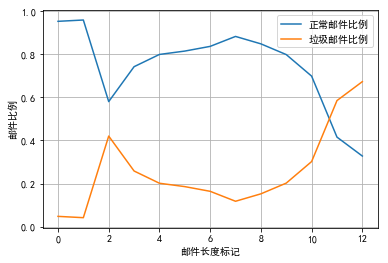

In [11]:
# 特征工程3：content分词
'''
jieba 第三方包是处理中文的一个重要分词工具
1.分词方法cut()有三种三种方式一般选择 精准模式（默认）
2.自定义分词字典，通过jieba.load_userdict('字典名.txt')加载
3.导入jieba 的posseg包可以查看分词后的词性
'''
df['content'] = df['content'].astype('str')
df['jieba_cut_content'] = list(map(lambda st: '/'.join(jieba.cut(st)), df['content']))


# 特征工程3：邮件长度
def process_content_length(lg):
    if lg < 10:
        return 0
    elif lg <= 100:
        return 1
    elif lg <= 500:
        return 2
    elif lg <= 1000:
        return 3
    elif lg <= 1500:
        return 4
    elif lg <= 2000:
        return 5
    elif lg <= 2500:
        return 6
    elif lg <= 3000:
        return 7
    elif lg <= 4000:
        return 8
    elif lg <= 5000:
        return 9
    elif lg <= 10000:
        return 10
    elif lg <= 20000:
        return 11
    elif lg <= 30000:
        return 12
    elif lg <= 50000:
        return 13
    else:
        return 14


# 判断内容长度
df['content_length'] = list(map(lambda st: len(st), df['content']))
df['content_lg_type'] = list(map(lambda st: process_content_length(st), df['content_length']))

df2 = df.groupby(["content_lg_type", "label"])["label"].agg(['count']).reset_index()
df3 = df2[df2.label == 1][['content_lg_type', 'count']].rename(columns={'count': 'c1'})
df4 = df2[df2.label == 0][['content_lg_type', 'count']].rename(columns={'count': 'c2'})

df5 = pd.merge(df3, df4)

df5['c1_rage'] = df5.apply(lambda r: r["c1"] / (r["c1"] + r["c2"]), axis=1)
df5["c2_rage"] = df5.apply(lambda r: r["c2"] / (r["c1"] + r["c2"]), axis=1)

plt.plot(df5['content_lg_type'], df5['c1_rage'], label=u'正常邮件比例')
plt.plot(df5['content_lg_type'], df5['c2_rage'], label=u'垃圾邮件比例')

plt.xlabel(u"邮件长度标记")
plt.ylabel(u"邮件比例")
plt.grid(True)
plt.legend(loc='best')
plt.show()

正常邮件的内容长度一般都在一定范围内，即不会太长也不会太短；但是一般情况下，邮件的内容越短，那么该邮件就越有可能是垃圾邮件。

#### 信号量计算

$$信号量=\begin{cases}
\frac{1}{exp(log_{10}(x)-log_{10}(L_1))*2}+ log_e(|x-L_1|+B_1)-log_e(x-L_2)+B_2,x \gt L_2 \\
\frac{1}{exp(log_{10}(x)-log_{10}(L_1))*2}+ log_e(|x-L_1|+B_1)+B_2,x \leq L_2
\end{cases}$$

- x表示文本长度
- L1和L2为调节因子，在该项目中，分别设置为500和10000B1和B2为信息量平滑因子，在该项目中，全部设置为1

0        8.452641
1        7.486084
2        7.175171
3        7.565682
4        1.992073
5        7.149011
6        4.807568
7        6.593684
8        7.626350
9        7.041340
10       7.590825
11       7.565682
12       8.079079
13       6.078763
14       7.175171
15       6.779823
16       7.884110
17       8.437038
18       7.175171
19       7.732029
20       8.042049
21       6.849239
22       7.175171
23       8.709597
24       7.377353
25       7.286521
26       7.299247
27       7.046855
28       8.484801
29       7.016625
           ...   
64590    5.959290
64591    7.139266
64592    7.646856
64593    3.293947
64594    7.767229
64595    7.317673
64596    6.563793
64597    6.933365
64598    6.968163
64599    6.799074
64600    6.725866
64601    8.456750
64602    7.560672
64603    6.359080
64604    7.382305
64605    7.024702
64606    6.933365
64607    6.799074
64608    6.903815
64609    6.939213
64610    8.668908
64611    8.514256
64612    6.799074
64613    5.012673
64614    6

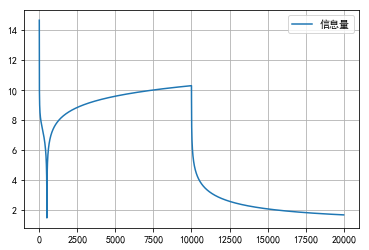

In [7]:
# 特征工程4：添加信号量
def precess_content_sema(x):
    if x > 10000:
        return 0.5 / np.exp(np.log10(500)) + np.log(abs(x - 500) + 1) - np.log(abs(x - 10000)) + 1
    else:
        return 0.5 / np.exp(np.log10(x) - np.log10(500)) + np.log(abs(x - 500) + 1) + 1


a = np.arange(1, 20000)
plt.plot(a, list(map(lambda t: precess_content_sema(t), a)), label=u"信息量")
plt.grid(True)
plt.legend(loc=0)
plt.savefig("信息量.png")

df['content_sema'] = list(map(lambda st: precess_content_sema(st), df['content_length']))
print(df['content_sema'])
print(df.head())
print(df.dtypes)

# 得到最终模型训练需要的数据
# drop()方法可以得到一个新的dataframe，不改变原始数据，其中inplace参数 可以 决定是否改变原始数组，默认 否
# 收发地址，时间，内容长短 都与是否为垃圾邮件贡献度不高，将这些列删除
# drop() 列表参数中为要删除的内容
df.drop(["From", "To", "date", "content", "to_address", "from_address",
         "date_week", "date_hour", "time_quantum", "content_length",
         "content_lg_type"], axis=1, inplace=True)
# print(df.dtypes)
# print(df.head())
df.to_csv('./results', encoding='utf-8', index=False)

#### 三、模型构建、训练、评估

In [12]:
import time
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import f1_score, precision_score, recall_score

#### 读取数据，分割数据

In [13]:
df = pd.read_csv('./results', sep=',')

df.dropna(axis=0, how='any', inplace=True)
x = df[['has_date', 'jieba_cut_content', 'content_sema']]
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)
print('训练集，测试集大小%d,%d' % (x_train.shape[0], x_test.shape[0]))

训练集，测试集大小51427,12857


In [14]:
# 对文本数据进行数值化处理
# CountVectorizer会将文本中的词语转换为词频矩阵，通过fit_transform计算各个词出现的次数、
# TfidfTransformer用于统计vectorizer中每个词的tf-idf值

# TfidfVectorizer 就是相当于完成了上面两个加起来的功能,将文本转换为tf-idf特征矩阵，从而进行文本相似度计算
tfid = TfidfVectorizer(norm='l2', use_idf=True)
svd = TruncatedSVD(n_components=20)
jieba_cut_content = list(x_train['jieba_cut_content'].astype('str'))
df1 = tfid.fit_transform(jieba_cut_content)  # 建模转换
print(df1)
print(df1.shape)
jieba_cut_content_test = list(x_test['jieba_cut_content'].astype('str'))
df2 = tfid.transform(jieba_cut_content_test)
df3 = svd.fit_transform(df1)
print(df3)
print(df3.shape)
df4 = svd.fit_transform(df2)
# 训练集最终数据
data = pd.DataFrame(df3)
data['has_date'] = list(x_train['has_date'])
data['content_sema'] = list(x_train['content_sema'])
# 测试集
data_test = pd.DataFrame(df4)
data_test['has_date'] = list(x_test['has_date'])
data_test['content_sema'] = list(x_test['content_sema'])

  (0, 110065)	0.08740843483447548
  (0, 80492)	0.09183944478230974
  (0, 194674)	0.11328766976378045
  (0, 179743)	0.06980749019101119
  (0, 165449)	0.06707155376172814
  (0, 179777)	0.06977660813062234
  (0, 120528)	0.059586363583888156
  (0, 147113)	0.06741968345289517
  (0, 85206)	0.22489627630404607
  (0, 108290)	0.06941167211597982
  (0, 135944)	0.05458519299271647
  (0, 122190)	0.3775963072418196
  (0, 108320)	0.08435353149083928
  (0, 135797)	0.08159847662001081
  (0, 171407)	0.07499423195813627
  (0, 159657)	0.08366781027463835
  (0, 154498)	0.0961725178479144
  (0, 142067)	0.1458580924972849
  (0, 184701)	0.07411142337107408
  (0, 107873)	0.07490833826051331
  (0, 64700)	0.07884634543965166
  (0, 189512)	0.08395455204454635
  (0, 81457)	0.09755768766884249
  (0, 73940)	0.09404777345560879
  (0, 91609)	0.24394109884420795
  :	:
  (51426, 123602)	0.06591804082375062
  (51426, 182526)	0.0659867399694356
  (51426, 150797)	0.05862555351311447
  (51426, 126353)	0.06588385413149858
 

#### 训练

In [15]:
from sklearn.naive_bayes import BernoulliNB  # 伯努利朴素贝叶斯模型

t1 = time.time()
bn = BernoulliNB(alpha=1.0, binarize=0.0005)
bn_model = bn.fit(data, y_train)
t2 = time.time() - t1
print('构建时间%.3fms' % (t2 * 1000))

y_pre = bn_model.predict(data_test)

print('准确率：%.5f' % precision_score(y_test, y_pre))
print('召回率：%.5f' % recall_score(y_test, y_pre))
print('F1值：%.5f' % f1_score(y_test, y_pre))

构建时间61.474ms
准确率：0.80843
召回率：0.98302
F1值：0.88722


In [16]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

t3 = time.time()
forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, random_state=6)
forest_model = forest.fit(data, y_train)
t4 = time.time() - t3
print('构建时间%.3fms' % (t4 * 1000))

y_pre1 = forest_model.predict(data_test)

print('准确率：%.5f' % precision_score(y_test, y_pre1))
print('召回率：%.5f' % recall_score(y_test, y_pre1))
print('F1值：%.5f' % f1_score(y_test, y_pre1))

构建时间3833.629ms
准确率：0.90869
召回率：0.99363
F1值：0.94927


In [17]:
# KNN
from sklearn.neighbors import KNeighborsClassifier  # KNN模型

t5 = time.time()
knn = KNeighborsClassifier(n_neighbors = 3)  # k为3，algorithm='auto'默认，也可指定为{'auto', 'ball_tree', 'kd_tree', 'brute'}
knn.fit(data, y_train)  # 训练模型
t6 = time.time() - t5
print('构建时间%.3fms' % (t6 * 1000))

y_pre1 = knn.predict(data_test)

print('准确率：%.5f' % precision_score(y_test, y_pre1))
print('召回率：%.5f' % recall_score(y_test, y_pre1))
print('F1值：%.5f' % f1_score(y_test, y_pre1))

构建时间351.169ms
准确率：0.97341
召回率：0.94955
F1值：0.96133


In [19]:
# SVM_rbf
from sklearn import svm  # SVM模型

t7 = time.time()
# 模型构建
'''
sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, 
                 shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, 
                 verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
svm.SVC API说明：
# 功能：使用SVM分类器进行模型构建
# 参数说明：
# C: 误差项的惩罚系数，默认为1.0；一般为大于0的一个数字，C越大表示在训练过程中对于总误差的关注度越高，
         也就是说当C越大的时候，对于训练集的表现会越好，但是有可能引发过度拟合的问题(overfiting)
# kernel：指定SVM内部函数的类型，可选值：linear、poly、rbf、sigmoid、precomputed(基本不用，有前提要求，要求特征属性数目和样本数目一样)；默认是rbf；
# degree：当使用多项式函数作为svm内部的函数的时候，给定多项式的项数，默认为3
# gamma：当SVM内部使用poly、rbf、sigmoid的时候，核函数的系数值，当默认值为auto的时候，实际系数为1/n_features
# coef0: 当核函数为poly或者sigmoid的时候，给定的独立系数，默认为0
# probability：是否启用概率估计，默认不启动，不太建议启动
# shrinking：是否开启收缩启发式计算，默认为True
# tol: 模型构建收敛参数，当模型的的误差变化率小于该值的时候，结束模型构建过程，默认值:1e-3
# cache_size：在模型构建过程中，缓存数据的最大内存大小，默认为空，单位MB
# class_weight：给定各个类别的权重，默认为空
# max_iter：最大迭代次数，默认-1表示不限制
# decision_function_shape: 决策函数，可选值：ovo和ovr，默认为None；推荐使用ovr；
'''
clf = svm.SVC(C=1, kernel='rbf', gamma=0.1)
# gamma值越大，训练集的拟合就越好，但是会造成过拟合，导致测试集拟合变差
# gamma值越小，模型的泛化能力越好，训练集和测试集的拟合相近，但是会导致训练集出现欠拟合问题，
# 从而，准确率变低，导致测试集准确率也变低。
# 模型训练
clf.fit(data, y_train)
t8 = time.time() - t7
print('构建时间%.3fms' % (t8 * 1000))

y_pre1 = clf.predict(data_test)

print('准确率：%.5f' % precision_score(y_test, y_pre1))
print('召回率：%.5f' % recall_score(y_test, y_pre1))
print('F1值：%.5f' % f1_score(y_test, y_pre1))

构建时间40039.683ms
准确率：0.94810
召回率：0.95190
F1值：0.95000


In [20]:
# 决策树
from sklearn.tree import DecisionTreeClassifier  # 分类树

t9 = time.time()
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(data, y_train)
t10 = time.time() - t9
print('构建时间%.3fms' % (t10 * 1000))

y_pre1 = model.predict(data_test)

print('准确率：%.5f' % precision_score(y_test, y_pre1))
print('召回率：%.5f' % recall_score(y_test, y_pre1))
print('F1值：%.5f' % f1_score(y_test, y_pre1))

构建时间870.481ms
准确率：0.90155
召回率：0.90027
F1值：0.90091


In [21]:
# GBDT
from sklearn.ensemble import GradientBoostingClassifier

t11 = time.time()
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, random_state=0)
gbdt.fit(data, y_train)
t12 = time.time() - t11
print('构建时间%.3fms' % (t12 * 1000))

y_pre1 = gbdt.predict(data_test)

print('准确率：%.5f' % precision_score(y_test, y_pre1))
print('召回率：%.5f' % recall_score(y_test, y_pre1))
print('F1值：%.5f' % f1_score(y_test, y_pre1))

构建时间8064.471ms
准确率：0.94017
召回率：0.98927
F1值：0.96410


### 总结

1. 垃圾邮件过滤一般常用的算法有Bayes、KNN、LR等。一般最常用的算法选择Bayes算法。
2. 垃圾邮件过滤系统中一般采用算法过滤+其它过滤统计结合的方式来进行垃圾邮件过滤。
3. 在垃圾邮件过滤中主要是需要进行分词操作，中文邮件一般可以选择使用jieba(python)、ANSJ( java)等工具进行分词处理。
4. 在垃圾邮件过滤中一般注意召回率，也就是说一般情况下，需要尽可能的提高垃圾邮件过滤的成功率。